# Logistic Regression - Predicting Survivals on the Titanic

In this project, I will be working with a famous Titanic Data Set from Kaggle.
(https://www.kaggle.com/c/titanic/overview)

I will build a model to predict a classification- survival or deceased. Let's begin our understanding of implementing Logistic Regression in Python for classification.

I am using a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown in this lecture notebook.

This is a project I've done in the course - **Python Data Science and Machine Learning Bootcamp** by Pierian Data.

# Part 1 - Exploratory Data Analysis

In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train = pd.read_csv('titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Survival: 0 = No, 1 = Yes

Pclass: Ticket Class

SibSp: Number of siblings / spouses aboard the Titanic

Parch: Number of parents / children aboard the Titanic

Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [323]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


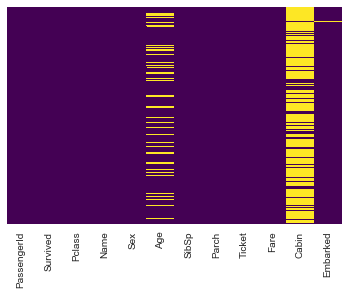

In [324]:
# Use heatmap to visualize where we miss data

sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [325]:
# The null % of Age is reasonable and we can replace them with some computation
# The null % of Cabin is too high and we will need to drop it

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

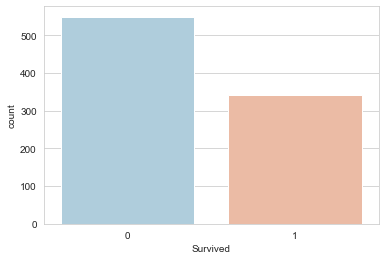

In [326]:
# Check out the survival ratio

sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

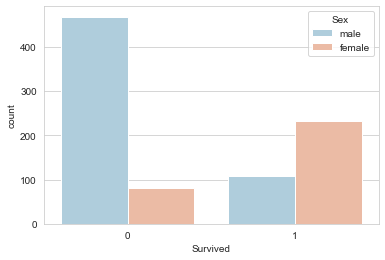

In [327]:
# By Sex
# Female has a higher survival rate

sns.countplot(x='Survived',data=train,palette='RdBu_r',hue='Sex')

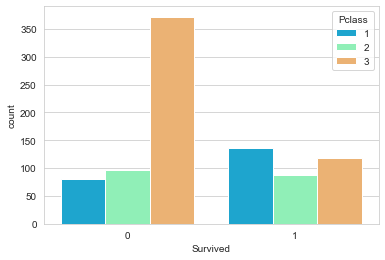

In [328]:
# By Ticket Class
# High proportion of 3rd class passengers did not survive

sns.countplot(x='Survived',data=train,palette='rainbow',hue='Pclass')

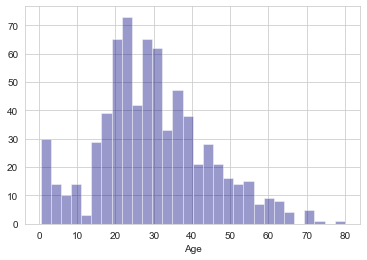

In [329]:
# Check out the distribution of passenger by Age
# Higher representative of younger passengers (<40 y/o)

sns.distplot(train['Age'].dropna(), kde=False, bins=30, color='navy')

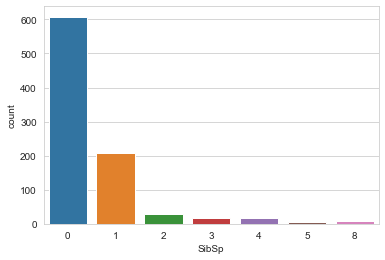

In [330]:
# Most of the passengers were alone
# Others with their spouse
# Very few families / groups

sns.countplot(x='SibSp',data=train)

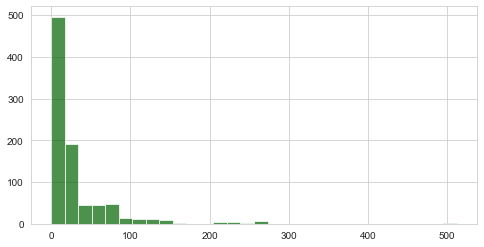

In [331]:
# Fare distribution is align with Pclass

train['Fare'].hist(color='darkgreen',alpha=0.7,figsize=(8,4),bins=30)

# Part 2 - Data Cleaning

In [332]:
# Calculate the mean of age to substitute the null values

a = dict(train.groupby(['Pclass'])['Age'].mean())
a

{1: 38.233440860215055, 2: 29.87763005780347, 3: 25.14061971830986}

In [333]:
def impute_age(cols):
    Age = cols[0]
    Class = cols[1]
    
    if pd.isnull(Age):
        return a[Class]
    
    else:
        return Age

In [334]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [335]:
# Check if the function worked well

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [336]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [337]:
# Confirm we do not have null values left

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

After cleaning all the null values, I will now convert certain data into categorical features.

In [338]:
Sex = pd.get_dummies(train['Sex'],drop_first=True)
Sex.head(3)

,male
0,1
1,0
2,0


In [339]:
Embark = pd.get_dummies(train['Embarked'],drop_first=True)
Embark.head(3)

,Q,S
0,0,1
1,0,0
2,0,1


In [340]:
# Drop the non-categorical values

train.drop(['Sex','Embarked','PassengerId','Name','Ticket'],inplace=True,axis=1)

In [341]:
train.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin
0,0,3,22.0,1,0,7.2500,NaN
1,1,1,38.0,1,0,71.2833,C85
2,1,3,26.0,0,0,7.9250,NaN


In [342]:
# Substitute with categoricals

train = pd.concat([train,Sex,Embark],axis=1)

In [343]:
train.drop(['Cabin'],inplace=True,axis=1)

In [344]:
train.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1


# Part 3 - Building a Logistic Regression Model

In [345]:
from sklearn.model_selection import train_test_split

In [346]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [347]:
# Train-Test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [348]:
# Train the model and make prediction
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [349]:
predictions = logmodel.predict(X_test)

# Part 4 - Evaluation

In [350]:
from sklearn.metrics import classification_report

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       154
           1       0.78      0.65      0.71       114

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [351]:
confusion_matrix(y_test,predictions)

array([[133,  21],
       [ 40,  74]])

# Thank you!